### Import all the required libraries

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [93]:
# load the Tesla stock dataset
df = pd.read_csv('Tasla_Stock_Updated_V2.csv', index_col=0)

In [94]:
# view the first 5 rows of the dataframe
df.head()

,Date,Open,High,Low,Close,Volume
0,2015-01-02,14.858000,14.883333,14.217333,14.620667,71466000
1,2015-01-05,14.303333,14.433333,13.810667,14.006000,80527500
2,2015-01-06,14.004000,14.280000,13.614000,14.085333,93928500
3,2015-01-07,14.223333,14.318667,13.985333,14.063333,44526000
4,2015-01-08,14.187333,14.253333,14.000667,14.041333,51637500


In [95]:
# view the last 5 rows of the dataframe
df.tail()

,Date,Open,High,Low,Close,Volume
2269,2024-01-09,238.110001,238.960007,232.039993,234.960007,96705700
2270,2024-01-10,235.100006,235.500000,231.289993,233.940002,91628500
2271,2024-01-11,230.570007,230.929993,225.369995,227.220001,105873600
2272,2024-01-12,220.080002,225.339996,217.149994,218.889999,122889000
2273,2024-01-16,215.100006,223.490005,212.180099,219.910004,115064708


The TSLA data ranges from **2015-01-02 to 2024-01-16**. There are **9 years** worth of stock trading information for TSLA ticker.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2274 entries, 0 to 2273
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2274 non-null   object 
 1   Open    2274 non-null   float64
 2   High    2274 non-null   float64
 3   Low     2274 non-null   float64
 4   Close   2274 non-null   float64
 5   Volume  2274 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 124.4+ KB


The ```Date``` column is an **object** datatype and needs to be converted to **datetime** format.

In [13]:
df.describe()

,Open,High,Low,Close,Volume
count,2274.000000,2274.000000,2274.000000,2274.000000,2.274000e+03
mean,103.493730,105.771617,101.036327,103.461794,1.142089e+08
std,111.136174,113.606095,108.399966,111.032019,7.688430e+07
min,9.488000,10.331333,9.403333,9.578000,1.062000e+07
25%,16.669833,16.933332,16.468833,16.693666,6.637762e+07
50%,23.221334,23.554000,22.842334,23.197333,9.359855e+07
75%,215.272503,219.629173,208.983334,215.227497,1.338214e+08
max,411.470001,414.496674,405.666656,409.970001,9.140820e+08


In [20]:
# check for null values in the dataframe
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [21]:
# check for duplicate rows in the dataframe
df.duplicated().sum()

np.int64(0)

In [22]:
# convert 'Date' column to datetime dtype
df['Date'] = pd.to_datetime(df['Date'])

# verify conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2274 entries, 0 to 2273
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2274 non-null   datetime64[ns]
 1   Open    2274 non-null   float64       
 2   High    2274 non-null   float64       
 3   Low     2274 non-null   float64       
 4   Close   2274 non-null   float64       
 5   Volume  2274 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 124.4 KB


### Exploratory Data Analysis 📊

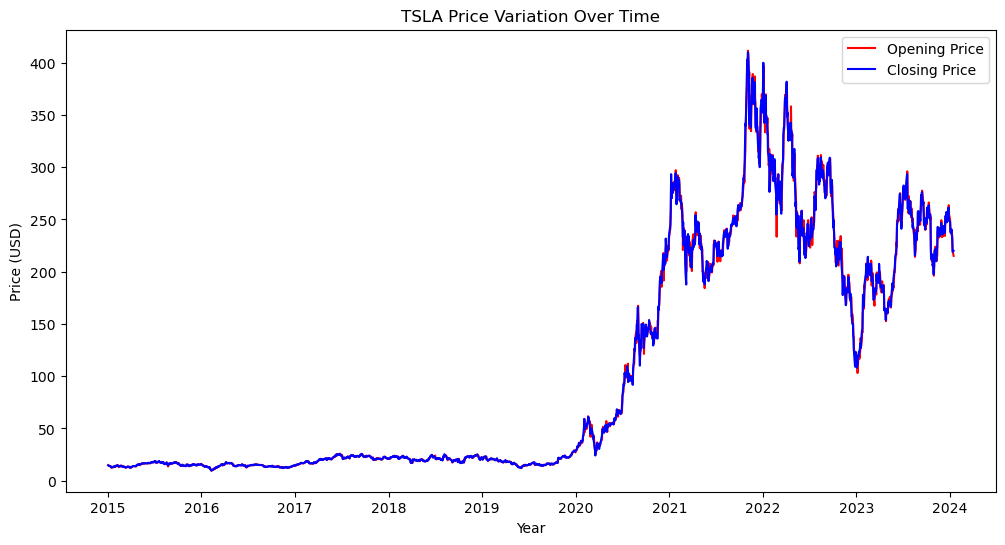

In [31]:
# Plot the variations in TSLA stock price over time
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Open'], label='Opening Price', color='red')
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.title('TSLA Price Variation Over Time')
plt.legend()

Text(0.5, 1.0, 'TSLA Shares Variation Over Time')

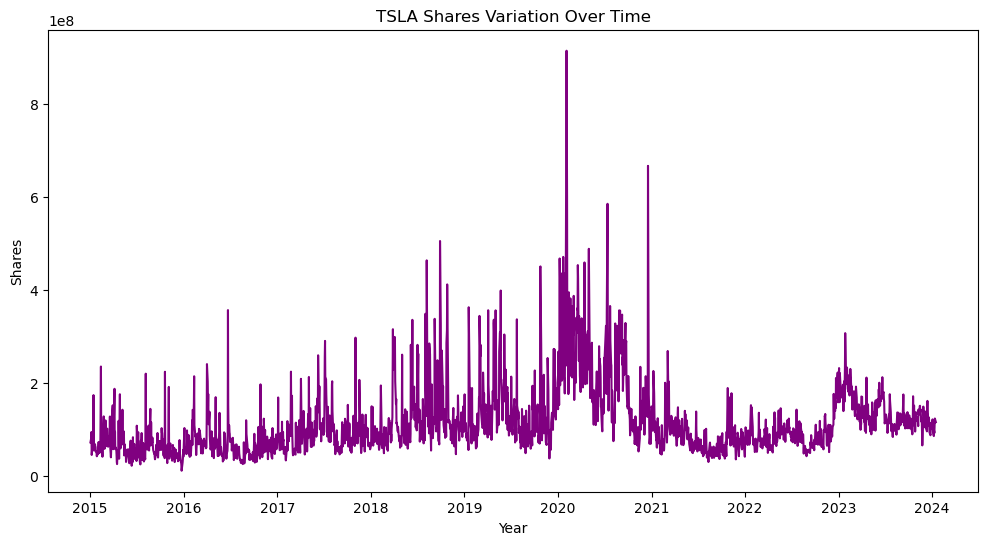

In [34]:
# Plot the variations in TSLA shares over time
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Volume'], color='purple')
plt.xlabel('Year')
plt.ylabel('Shares')
plt.title('TSLA Shares Variation Over Time')

Text(0.5, 1.0, 'Relationship between Opening and Closing Prices for TSLA')

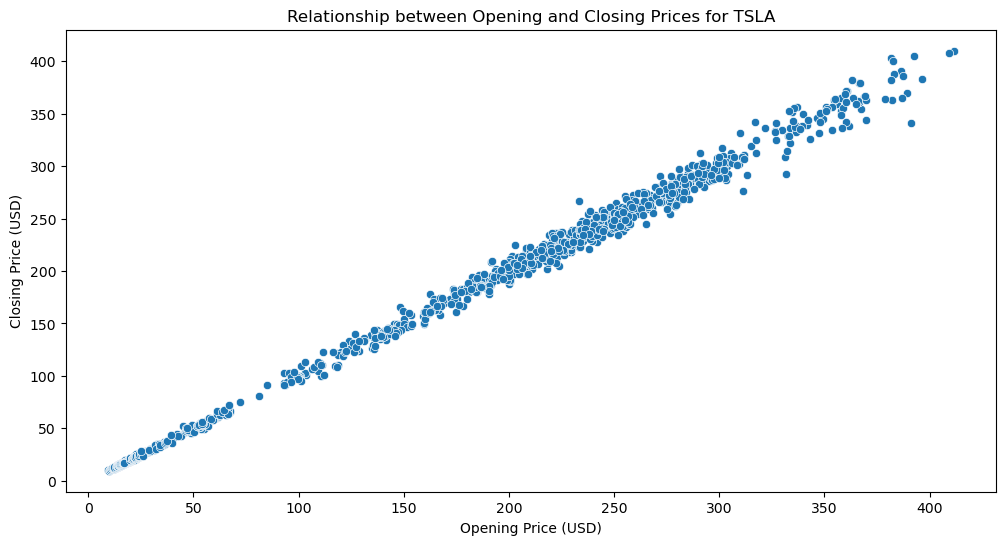

In [96]:
# visually examine the relationship between the Opening and Closing Prices
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Open', y='Close')
plt.xlabel('Opening Price (USD)')
plt.ylabel('Closing Price (USD)')
plt.title('Relationship between Opening and Closing Prices for TSLA')

Text(0.5, 1.0, 'Relationship between High and Low Prices for TSLA')

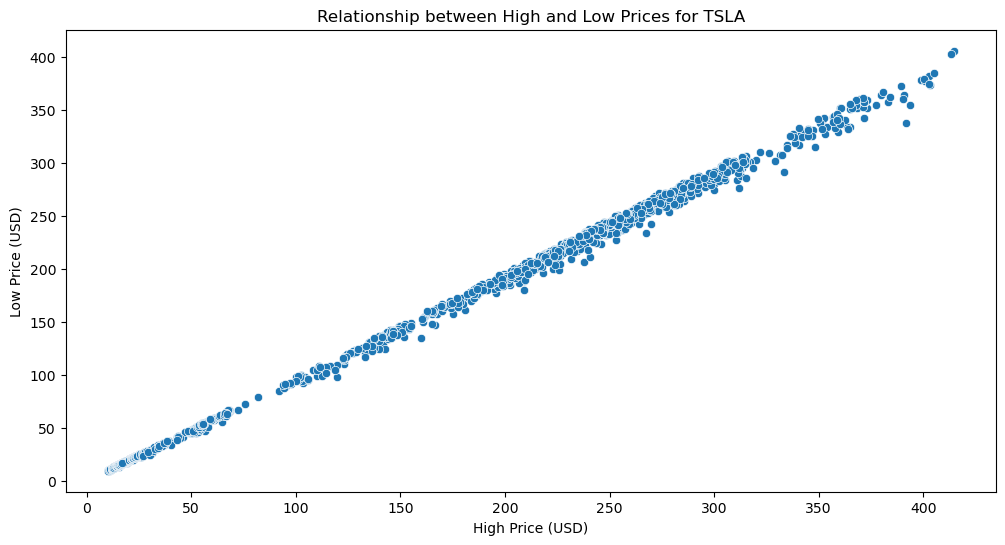

In [36]:
# visually examine the relationship between High and Low Prices
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='High', y='Low')
plt.xlabel('High Price (USD)')
plt.ylabel('Low Price (USD)')
plt.title('Relationship between High and Low Prices for TSLA')

Text(0.5, 1.0, 'Numerical Relationship between Features')

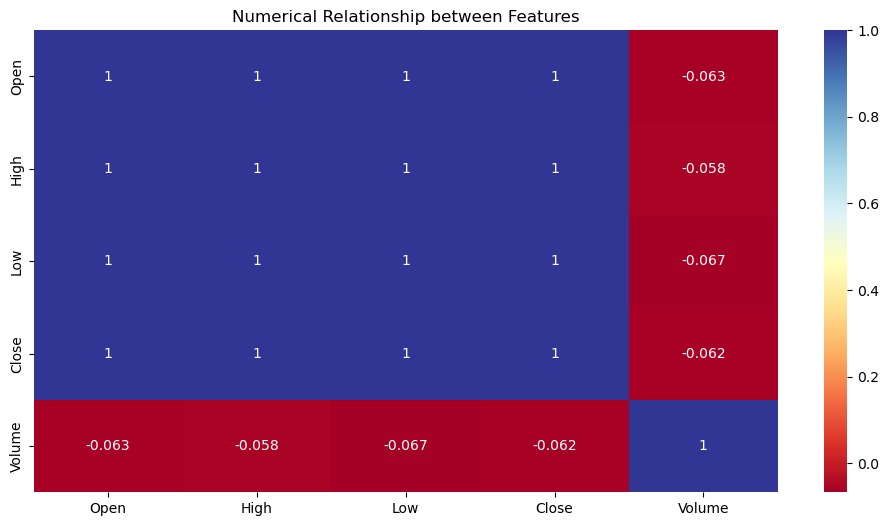

In [45]:
# drop 'Date' column to only include meaningful insights
num_corr = df.drop('Date', axis=1).corr()

# examine the heatmap of the numerical features of the dataframe
plt.figure(figsize=(12,6))
sns.heatmap(data=num_corr, annot=True, cmap='RdYlBu')
plt.title('Numerical Relationship between Features')

```Open```, ```High```, ```Low```, and ```Close``` are almost perfectly correlated **(ρ ≈ 0.999)***, so using them together adds redundancy and multicollinearity. A single representative is preferred (i.e. ```Close```) or transformed features  (i.e. returns, ranges) while ```Volume``` is weakly, slightly negatively correlated with prices **(ρ ≈ −0.06)**.

### Model Building 🤖🛠️

In [99]:
# isolate the target variable from the dataset for modeling
closing_value = df['Close'].values # convert to numpy array 

# split the dataset for training/testing 
length = len(closing_value)
split = int(length * 0.90) # split the dataset (i.e. 90% for training, 10% for testing)
train_raw = closing_value[:split]
test_raw = closing_value[split:]

# confirm above split
train_raw.shape, test_raw.shape

((2046,), (228,))

In [61]:
# convert 1D array to 2D in order to scale the data using MinMaxScaler function
train_2d = train_raw.reshape(-1,1)
test_2d = test_raw.reshape(-1,1)

# confirm reshaping
train_2d.shape, test_2d.shape

((2046, 1), (228, 1))

In [65]:
# perform scaling of the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_2d)
test_scaled = scaler.transform(test_2d)

# assign a sliding window (let's say 14 days)
def build_X_y(data, s_w):
    X = []
    y = []
    for i in range(s_w, len(data)):
        X.append(data[i-s_w:i, 0])
        y.append(data[i,0])
    X = np.array(X)
    y = np.array(y)
    return X.reshape(X.shape[0], X.shape[1], 1), y

In [78]:
# assign sliding window = 14
s_w = 14

# assign X_train, X_test, y_train, y_test values
X_train, y_train = build_X_y(train_scaled, s_w)
X_test, y_test = build_X_y(test_scaled, s_w)

# confirm shape for each 
print(f'X_train: {X_train.shape},\ny_train: {y_train.shape}, \nX_test: {X_test.shape}, \ny_test: {y_test.shape}')

X_train: (2032, 14, 1),
y_train: (2032,), 
X_test: (214, 14, 1), 
y_test: (214,)


In [89]:
# build LSTM model using keras library
model = keras.models.Sequential()
model.add(keras.layers.LSTM(128, return_sequences=True, input_shape=(s_w,1)))
model.add(keras.layers.LSTM(128, return_sequences=False))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, activation='tanh'))

# train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True, monitor='val_loss')

model.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[cb])

# make predictions
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1,1)).ravel()
y_true = scaler.inverse_transform(y_test.reshape(-1,1)).ravel()

# check metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
print(f'MAE: {mae:.4f} | RMSE: {rmse:.4f}')

/opt/anaconda3/envs/nlp_env/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 14, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,465 (806.50 KB)

 Trainable params: 206,465 (806.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0095
Epoch 2/100
19/64 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0025

/opt/anaconda3/envs/nlp_env/lib/python3.11/site-packages/keras/src/callbacks/early_stopping.py:99: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0022
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0019
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0016
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0015
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0015
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0013
Epoch 8/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0014
Epoch 9/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0012
Epoch 10/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0012
Epoch 11/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0011
Epoch 12/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.9373e-04
Epoch 13/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0010    
Epoch 14/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.8002e-04
Epoch 15/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 9.8676e-04
Epoch 16/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step

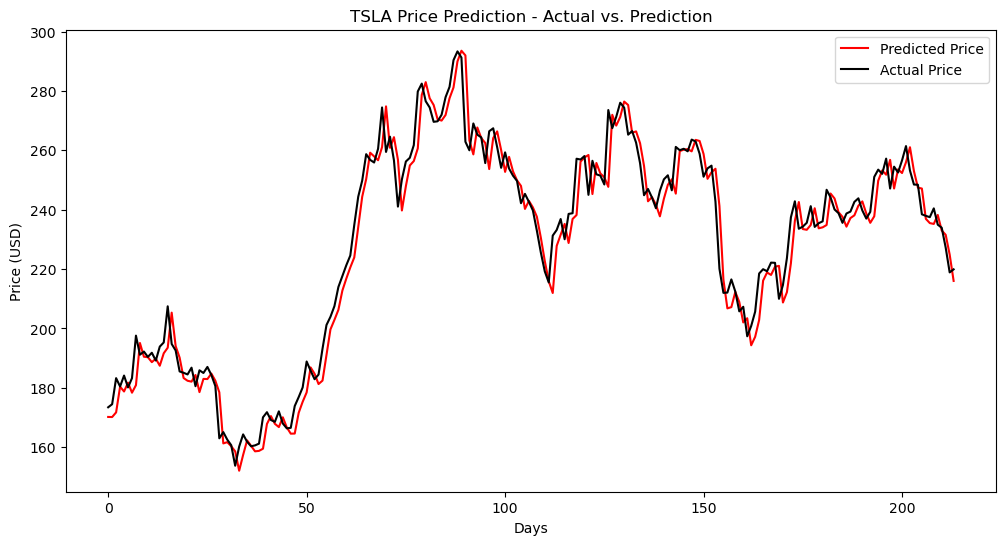

In [100]:
# Plot the y_pred vs. y_true graph
plt.figure(figsize=(12,6))
plt.plot(y_pred, label='Predicted Price', color='red')
plt.plot(y_true, label='Actual Price', color='black')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.title('TSLA Price Prediction - Actual vs. Prediction')
plt.legend()